# Water quality (Machine Learning)
Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from numpy import isnan
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


Helps interface with the os

In [2]:
import os
print(os.listdir(r"D:\Water quality machine learning"))

['Final dataset 2.csv', 'Final dataset.csv', 'final.csv', 'SS', 'waterquality.csv', 'water_dataX.csv']


Reading the data

In [3]:
data=pd.read_csv(r'D:\Water quality machine learning\Final.csv')

In [4]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,31.6,6.5,33.6,NAN,0.1,11,27,2014.0
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,7.2,738,2.7,0.518,5000,202,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,6.3,585,2.6,0.155,7000,315,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,6.2,98,1.2,NAN,9500,570,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,6.5,91,1.3,NAN,3050,562,2003.0


Checking the data types

In [5]:
data.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                 object
D.O. (mg/l)                          object
PH                                   object
CONDUCTIVITY (mhos/cm)               object
B.O.D. (mg/l)                        object
NITRATENAN N+ NITRITENANN (mg/l)     object
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean       object
year                                float64
dtype: object

In [6]:
# Changing the datatypes to numeric
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['CONDUCTIVITY (mhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (mhos/cm)'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [7]:
data.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (mhos/cm)              float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                float64
dtype: object

In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.


C:\Users\Haran Pragadeesh\Ml projects>SET DISTUTILS_USE_SDK=1 

C:\Users\Haran Pragadeesh\Ml projects>SET MSSdk=1 

C:\Users\Haran Pragadeesh\Ml projects>SET "VS_VERSION=15.0" 

C:\Users\Haran Pragadeesh\Ml projects>SET "VS_MAJOR=15" 

C:\Users\Haran Pragadeesh\Ml projects>SET "VS_YEAR=2017" 

C:\Users\Haran Pragadeesh\Ml projects>set "MSYS2_ARG_CONV_EXCL=/AI;/AL;/OUT;/out" 

C:\Users\Haran Pragadeesh\Ml projects>set "MSYS2_ENV_CONV_EXCL=CL" 

C:\Users\Haran Pragadeesh\Ml projects>set "PY_VCRUNTIME_REDIST=\bin\vcruntime140.dll" 

C:\Users\Haran Pragadeesh\Ml projects>set "CXX=cl.exe" 

C:\Users\Haran Pragadeesh\Ml projects>set "CC=cl.exe" 

C:\Users\Haran Pragadeesh\Ml projects>set "VSINSTALLDIR=" 

C:\Users\Haran Pragadeesh\Ml projects>for /F "usebackq tokens=*" %i in (`vswhere.exe -nologo -products * -version [15.0,16.0) -property installationPath`) do (set "VSINSTALLDIR=%i\" ) 

C:\Users\Haran Pra

The system cannot find the file specified.
The system cannot find the path specified.
The system cannot find the path specified.


In [9]:
start=1
end=1990
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [10]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,31.6,6.5,33.6,NaN,0.100,11.0,27.0,2014.0
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.0,8391.0,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.0,5330.0,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.0,8443.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,7.2,738.0,2.7,0.518,5000.0,202.0,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,6.3,585.0,2.6,0.155,7000.0,315.0,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,6.2,98.0,1.2,NaN,9500.0,570.0,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,6.5,91.0,1.3,NaN,3050.0,562.0,2003.0


In [11]:
data = data.fillna(data.mean())
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1923.745088,NaN,NaN,26.209814,6.405341,7.198439,992.951833,6.88394,1.621228,275776.747884,400836.451957,2010.042317
1,1393.000000,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,31.600000,6.500000,33.600000,6.88394,0.100000,11.000000,27.000000,2014.000000
2,1399.000000,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.700000,7.200000,189.000000,2.00000,0.200000,4953.000000,8391.000000,2014.000000
3,1475.000000,ZUARI AT PANCHAWADI,GOA,29.500000,6.300000,6.900000,179.000000,1.70000,0.100000,3243.000000,5330.000000,2014.000000
4,3181.000000,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.800000,6.900000,64.000000,3.80000,0.500000,5382.000000,8443.000000,2014.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.000000,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.900000,7.200000,738.000000,2.70000,0.518000,5000.000000,202.000000,2003.000000
1982,1450.000000,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.500000,6.300000,585.000000,2.60000,0.155000,7000.000000,315.000000,2003.000000
1983,1403.000000,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.600000,6.200000,98.000000,1.20000,1.621228,9500.000000,570.000000,2003.000000
1984,1404.000000,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.700000,6.500000,91.000000,1.30000,1.621228,3050.000000,562.000000,2003.000000


In [12]:
data['LOCATIONS'][1]
columns = ['STATION CODE','LOCATIONS','STATE','Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']

In [13]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1923.745088,NaN,NaN,26.209814,6.405341,7.198439,992.951833,6.88394,1.621228,275776.747884,400836.451957,2010.042317
1,1393.000000,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,31.600000,6.500000,33.600000,6.88394,0.100000,11.000000,27.000000,2014.000000
2,1399.000000,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.700000,7.200000,189.000000,2.00000,0.200000,4953.000000,8391.000000,2014.000000
3,1475.000000,ZUARI AT PANCHAWADI,GOA,29.500000,6.300000,6.900000,179.000000,1.70000,0.100000,3243.000000,5330.000000,2014.000000
4,3181.000000,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.800000,6.900000,64.000000,3.80000,0.500000,5382.000000,8443.000000,2014.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.000000,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.900000,7.200000,738.000000,2.70000,0.518000,5000.000000,202.000000,2003.000000
1982,1450.000000,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.500000,6.300000,585.000000,2.60000,0.155000,7000.000000,315.000000,2003.000000
1983,1403.000000,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.600000,6.200000,98.000000,1.20000,1.621228,9500.000000,570.000000,2003.000000
1984,1404.000000,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.700000,6.500000,91.000000,1.30000,1.621228,3050.000000,562.000000,2003.000000


In [14]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']
#calculation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))
#calc of B.O.D
data['nbod']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))




In [15]:
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,NaN,0.100,NaN,2014.0,40,100,0,0,100,100
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200,8391.0,2014.0,100,80,40,100,60,100
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100,5330.0,2014.0,80,100,40,100,60,100
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014.0,80,80,40,80,100,100
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014.0,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.7,0.518,202.0,2003.0,100,100,60,100,0,100
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.6,0.155,315.0,2003.0,0,100,60,100,0,100
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.2,NaN,570.0,2003.0,0,100,40,100,80,0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.3,NaN,562.0,2003.0,40,100,40,100,80,0


In [16]:
data = data.fillna(data.mean())
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,40,100,0,0,100,100
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,100,80,40,100,60,100
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,80,100,40,100,60,100
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,80,80,40,80,100,100
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,100,100,60,100,0,100
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,0,100,60,100,0,100
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,0,100,40,100,80,0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,40,100,40,100,80,0


In [17]:
SipH = 7.5
SiBOD = 1
SiNa = 20
SiCO = 4
SiDO = 10
SiEC = 75

In [18]:
ReciSi= 1/SipH + 1/SiBOD + 1/SiNa + 1/SiCO + 1/SiDO + 1/SiEC 
k= 1/ReciSi

In [19]:
wipH = k/SipH 
wiBOD= k/SiBOD
wiNa = k/SiNa
wiCO = k/SiCO
wiDO = k/SiDO
wiEC = k/SiEC

In [20]:
SmWi = wipH+wiBOD+wiNa+wiCO+wiDO+wiEC

In [21]:
WipH = wipH/SmWi
WiBOD= wiBOD/SmWi
WiNa = wiNa/SmWi
WiCO = wiCO/SmWi
WiDO = wiDO/SmWi
WiEC = wiEC/SmWi
print (WipH, WiBOD, WiNa, WiCO, WiDO, WiEC)

0.08620689655172414 0.646551724137931 0.032327586206896554 0.16163793103448276 0.06465517241379311 0.008620689655172414


In [22]:
data['wph']=data.npH * WipH
data['wdo']=data.ndo * WiDO
data['wbod']=data.nbod * WiBOD
data['wec']=data.nec* WiEC
data['wna']=data.nna * WiNa
data['wco']=data.nco * WiCO
data['wqi']=data.wph+data.wdo+data.wbod+data.wec+data.wna+data.wco 
df1  = data
df1

,station,location,state,do,ph,co,bod,na,tc,year,...,nbod,nec,nna,wph,wdo,wbod,wec,wna,wco,wqi
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,...,0,100,100,3.448276,6.465517,0.000000,0.862069,3.232759,0.000000,14.008621
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,...,100,60,100,8.620690,5.172414,64.655172,0.517241,3.232759,6.465517,88.663793
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,...,100,60,100,6.896552,6.465517,64.655172,0.517241,3.232759,6.465517,88.232759
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,...,80,100,100,6.896552,5.172414,51.724138,0.862069,3.232759,6.465517,74.353448
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,...,100,80,100,8.620690,5.172414,64.655172,0.689655,3.232759,6.465517,88.836207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,...,100,0,100,8.620690,6.465517,64.655172,0.000000,3.232759,9.698276,92.672414
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,...,100,0,100,0.000000,6.465517,64.655172,0.000000,3.232759,9.698276,84.051724
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,...,100,80,0,0.000000,6.465517,64.655172,0.689655,0.000000,6.465517,78.275862
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,...,100,80,0,3.448276,6.465517,64.655172,0.689655,0.000000,6.465517,81.724138


In [23]:
dum = ['station','location','state']
data[dum]

,station,location,state
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA
3,1475.0,ZUARI AT PANCHAWADI,GOA
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA
...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN


In [24]:
df_dummy = pd.get_dummies(data[dum])
df= pd.concat([data, df_dummy], axis = 1)


In [25]:
dataframe = df1.drop(['do','ph','co','bod','na','tc','ndo','nbod','nec','nna','nco','npH'],axis =1)

columns = ['wdo','wbdo','wec','wna','wco','wph']
labels = ['wqi']
corr_matrix = dataframe.corr()
corr_matrix

,station,year,wph,wdo,wbod,wec,wna,wco,wqi
station,1.000000,0.436308,0.133062,-0.013351,0.023072,0.061919,-0.030840,0.143093,0.074990
year,0.436308,1.000000,0.204549,-0.046121,0.041229,0.080841,0.180903,0.087605,0.098001
wph,0.133062,0.204549,1.000000,-0.005029,-0.110346,-0.161860,-0.066067,-0.084672,0.040922
wdo,-0.013351,-0.046121,-0.005029,1.000000,0.432197,0.336354,-0.025295,0.298060,0.531560
wbod,0.023072,0.041229,-0.110346,0.432197,1.000000,0.413296,0.017664,0.370868,0.953176
wec,0.061919,0.080841,-0.161860,0.336354,0.413296,1.000000,-0.004849,0.300124,0.444413
wna,-0.030840,0.180903,-0.066067,-0.025295,0.017664,-0.004849,1.000000,-0.156561,0.023996
wco,0.143093,0.087605,-0.084672,0.298060,0.370868,0.300124,-0.156561,1.000000,0.570869
wqi,0.074990,0.098001,0.040922,0.531560,0.953176,0.444413,0.023996,0.570869,1.000000


In [26]:
dataframe

,station,location,state,year,wph,wdo,wbod,wec,wna,wco,wqi
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,2014.0,3.448276,6.465517,0.000000,0.862069,3.232759,0.000000,14.008621
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,2014.0,8.620690,5.172414,64.655172,0.517241,3.232759,6.465517,88.663793
3,1475.0,ZUARI AT PANCHAWADI,GOA,2014.0,6.896552,6.465517,64.655172,0.517241,3.232759,6.465517,88.232759
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,2014.0,6.896552,5.172414,51.724138,0.862069,3.232759,6.465517,74.353448
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,2014.0,8.620690,5.172414,64.655172,0.689655,3.232759,6.465517,88.836207
...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,2003.0,8.620690,6.465517,64.655172,0.000000,3.232759,9.698276,92.672414
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,2003.0,0.000000,6.465517,64.655172,0.000000,3.232759,9.698276,84.051724
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,2003.0,0.000000,6.465517,64.655172,0.689655,0.000000,6.465517,78.275862
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,2003.0,3.448276,6.465517,64.655172,0.689655,0.000000,6.465517,81.724138


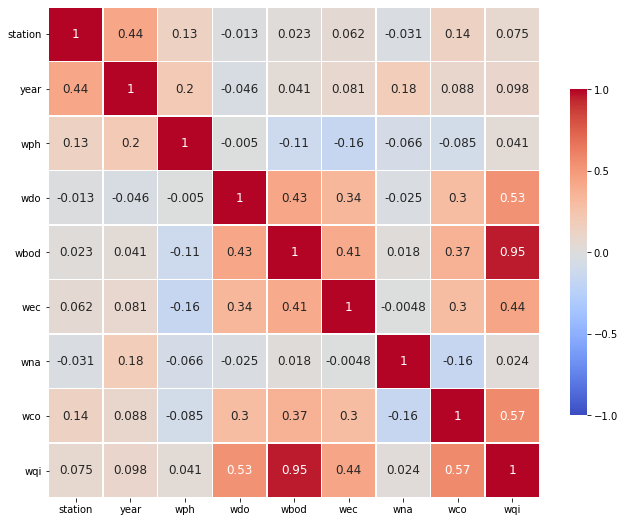

In [27]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [28]:
#calculation overall wqi for each year
ag=df1.groupby('station')['wqi'].mean()

In [29]:
ag.head()

station
17.0    84.208464
18.0    88.992947
20.0    88.444357
21.0    89.204545
42.0    91.289185
Name: wqi, dtype: float64

In [30]:
data=ag.reset_index(level=0,inplace=False)
data

,station,wqi
0,17.0,84.208464
1,18.0,88.992947
2,20.0,88.444357
3,21.0,89.204545
4,42.0,91.289185
...,...,...
314,3465.0,91.379310
315,3466.0,91.264368
316,3468.0,90.804598
317,3471.0,92.456897


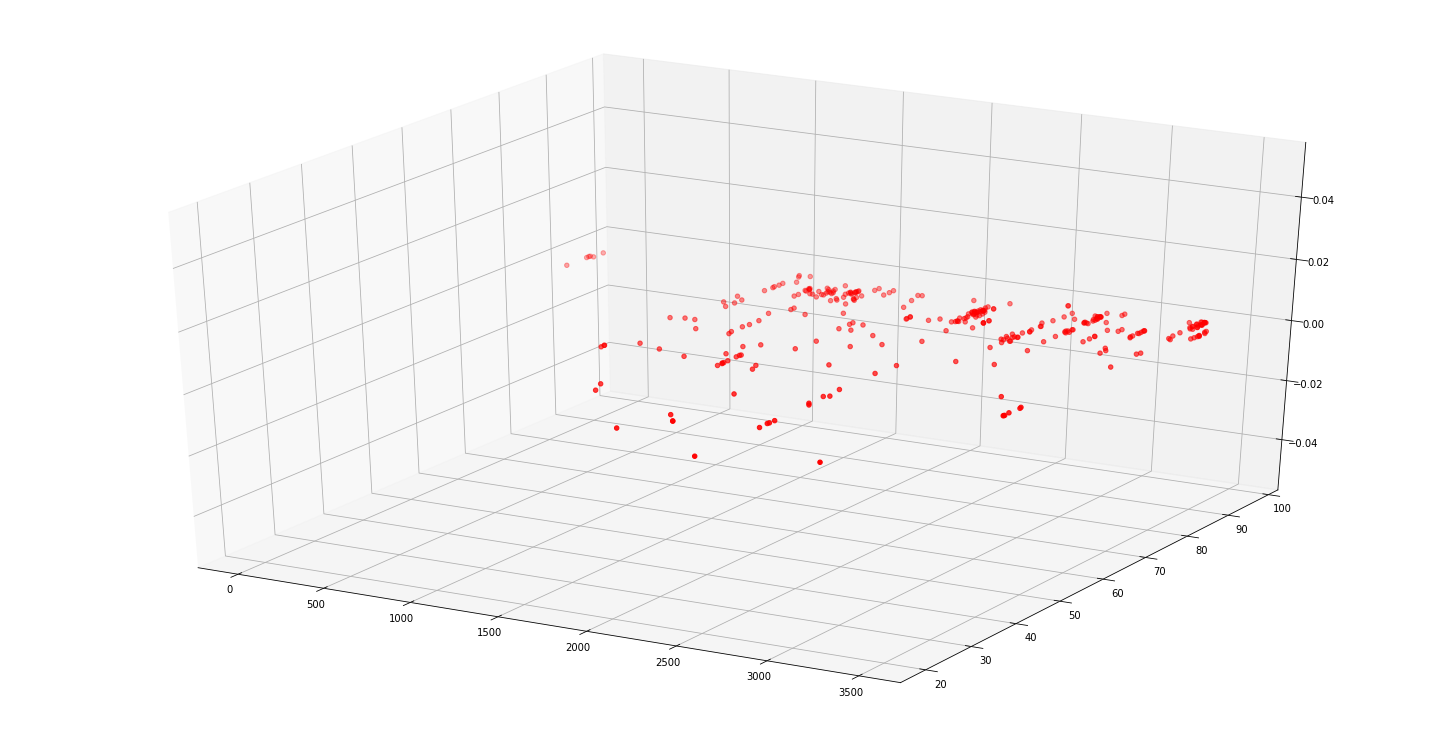

,station,wqi
0,17.0,84.208464
1,18.0,88.992947
2,20.0,88.444357
3,21.0,89.204545
4,42.0,91.289185
...,...,...
314,3465.0,91.379310
315,3466.0,91.264368
316,3468.0,90.804598
317,3471.0,92.456897


In [31]:
#visualizing the filttered data

station=data['station'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(station,AQI, color='red')
plt.show()
data

In [32]:
data = data[np.isfinite(data['wqi'])]
data.head()

,station,wqi
0,17.0,84.208464
1,18.0,88.992947
2,20.0,88.444357
3,21.0,89.204545
4,42.0,91.289185


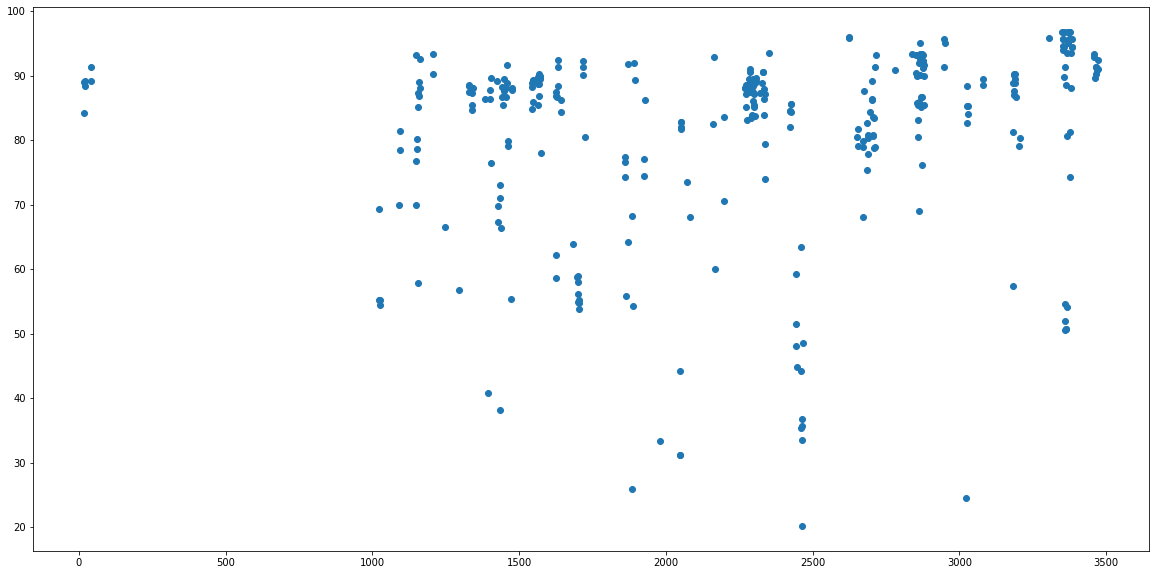

In [33]:
#scatter plot of data points
cols =['station']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

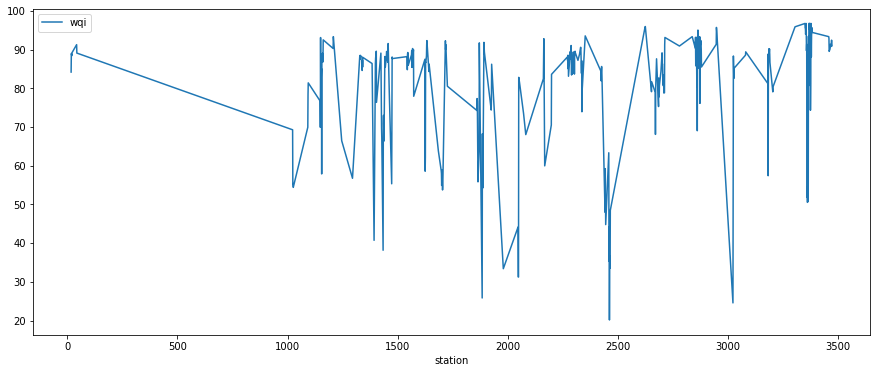

In [34]:
import matplotlib.pyplot as plt
data=data.set_index('station')
data.plot(figsize=(15,6))
plt.show()

In [35]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,station,wqi
0,17.0,84.208464
1,18.0,88.992947
2,20.0,88.444357
3,21.0,89.204545
4,42.0,91.289185
...,...,...
314,3465.0,91.379310
315,3466.0,91.264368
316,3468.0,90.804598
317,3471.0,92.456897


In [36]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [37]:
cols =['station']
y = data['wqi']
x=data[cols]

In [38]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [39]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
a=reg.predict(x_test)
a

array([83.39175384, 80.56958972, 80.2938166 , 78.70361088, 78.74484798,
       77.69072457, 79.16495095, 81.64690899, 78.39690993, 83.6314445 ,
       77.67783798, 77.67526066, 77.3530958 , 78.41495117, 80.9639195 ,
       82.9201045 , 82.93814573, 78.90721906, 80.74227008, 82.10309443,
       82.93299109, 83.36082602, 78.75000262, 74.76289037, 77.53608544,
       78.38660066, 81.68041414, 79.09536334, 83.39690848, 80.65979588,
       83.64433109, 83.35567138, 82.0309295 , 83.41494971, 78.6933016 ,
       80.73969276, 78.17010588, 79.09278602, 78.16752856, 78.9252603 ,
       78.51288928, 77.71134312, 82.07989856, 78.52062124, 78.94845617,
       83.37113529, 78.90979638, 77.53350812, 82.92783645, 82.65721798,
       79.05928088, 83.62886718, 82.09020783, 82.13659957, 81.63917703,
       79.1030953 , 80.64690928, 79.14175508, 82.06701196, 82.11855834,
       82.93041377, 79.59278588, 78.41237385, 82.13144493])

In [41]:
y_test

291    93.477011
134    88.115764
129    92.838670
68     89.224138
70     88.671630
         ...    
241    86.724138
267    90.244253
113    91.886973
46     38.170498
246    92.327586
Name: wqi, Length: 64, dtype: float64

In [42]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:139.90


In [43]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 

In [44]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.00000000e+00, -2.88728318e+00],
       [ 1.00000000e+00, -2.88600289e+00],
       [ 1.00000000e+00, -2.88344230e+00],
       [ 1.00000000e+00, -2.88216201e+00],
       [ 1.00000000e+00, -2.85527584e+00],
       [ 1.00000000e+00, -2.85399555e+00],
       [ 1.00000000e+00, -1.59930765e+00],
       [ 1.00000000e+00, -1.59802736e+00],
       [ 1.00000000e+00, -1.59674707e+00],
       [ 1.00000000e+00, -1.59546677e+00],
       [ 1.00000000e+00, -1.51096738e+00],
       [ 1.00000000e+00, -1.50968709e+00],
       [ 1.00000000e+00, -1.50840680e+00],
       [ 1.00000000e+00, -1.43927093e+00],
       [ 1.00000000e+00, -1.43799064e+00],
       [ 1.00000000e+00, -1.43671035e+00],
       [ 1.00000000e+00, -1.43543005e+00],
       [ 1.00000000e+00, -1.43414976e+00],
       [ 1.00000000e+00, -1.43158917e+00],
       [ 1.00000000e+00, -1.43030888e+00],
       [ 1.00000000e+00, -1.42902858e+00],
       [ 1.00000000e+00, -1.42518770e+00],
       [ 1.00000000e+00, -1.42390741e+00],
       [ 1.

In [45]:
alpha = 0.01 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 81.00, 2.45


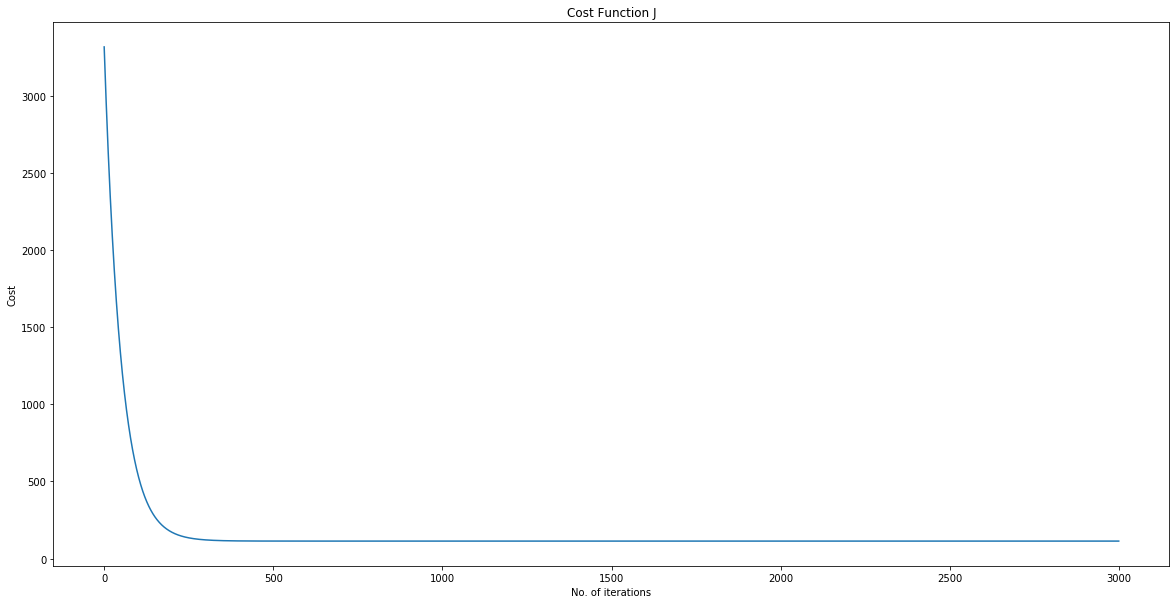

In [46]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [47]:
import numpy as np
newB=[80.74, 3.14]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt

,station,wqi,Actual,Predicted
0,17.0,84.208464,84.208464,71.673931
1,18.0,88.992947,88.992947,71.677951
2,20.0,88.444357,88.444357,71.685991
3,21.0,89.204545,89.204545,71.690011
4,42.0,91.289185,91.289185,71.774434
...,...,...,...,...
314,3465.0,91.379310,91.379310,85.535313
315,3466.0,91.264368,91.264368,85.539333
316,3468.0,90.804598,90.804598,85.547373
317,3471.0,92.456897,92.456897,85.559434


In [48]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

15.086265301955585


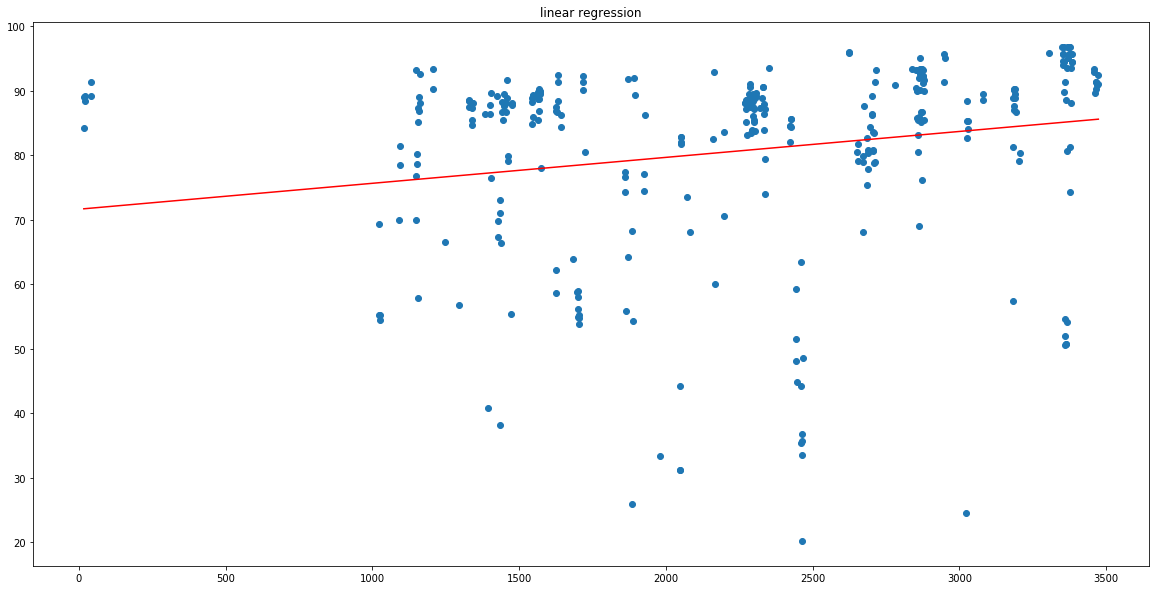

In [49]:
x_axis=dt.station
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()

In [50]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [53]:
X = df1[['do','co','bod']]
Y = df1['wqi']

In [55]:

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define wider model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -72.30 (29.60) MSE
